<a href="https://colab.research.google.com/github/uruenariobo/2024.2Modelos2-Estimation-of-obesity-levels/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Exploración del Dataframe

###Se obtienen los primeros 5 valores de la base de datos para conocer un poco la estructura.

In [ ]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Se analizan los tipos de datos de cada columna. Adicionalmente se identifica que no hay datos faltantes en todo el dataset.

In [ ]:
#Tipo de datos
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

###Se obtiene el tamaño del dataframe.

In [ ]:
#Tamaño
print(df.shape)

(2111, 17)


###El tamaño obtenido es de 2111 registros cada uno con 17 columnas.

###Posteriormente se calculan las medidas de tendencia central para conocer la distribución de los datos.

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


##Se identifica la cantidad de registros que cada una de las variables categóricas. Y cúal tipo de categoria existe para cada una de estas variables.

In [ ]:
df['Gender'].unique()
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [ ]:
df['family_history_with_overweight'].unique()
df['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [ ]:
df['FAVC'].unique()
df['FAVC'].value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [ ]:
df['CAEC'].unique()
df['CAEC'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [ ]:
df['SMOKE'].unique()
df['SMOKE'].value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

In [ ]:
df['SCC'].unique()
df['SCC'].value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

In [ ]:
df['CALC'].unique()
df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [ ]:
df['MTRANS'].unique()
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [ ]:
df['NObeyesdad'].unique()
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

##Se grafican solamente las variables numéricas mediante la matriz de correlación.

<ipython-input-108-588208a2ce46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


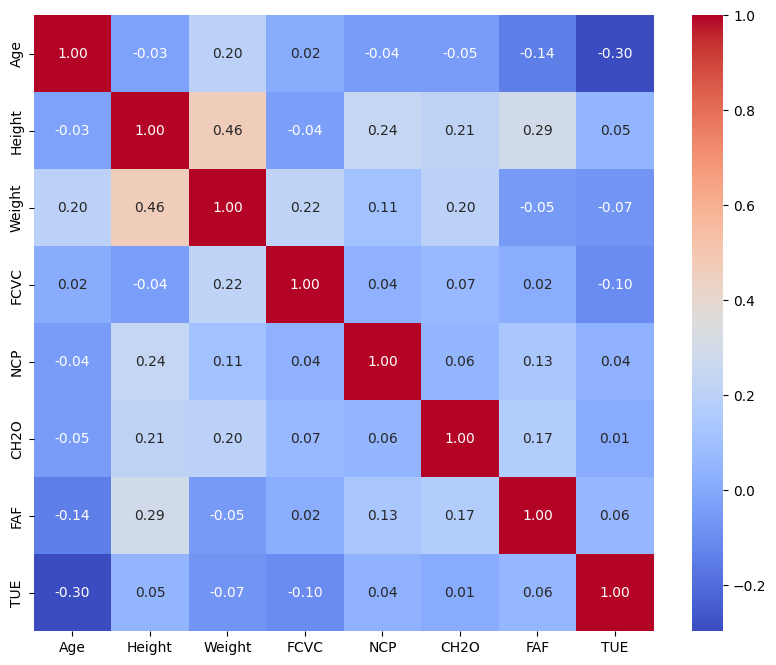

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

La matriz de correlación dificulta el análisis de los datos porque la variable objetivos es categórica y contiene 7 clases,

Sin embargo, se identifican las siguientes relaciones:
- La altura está directamente relacionada con el peso. (0.46)
- A mayor altura el nivel de actividad fisica es mayor. (0.29)
- Mientras mayor sea la altura mas comidas principales tendrá en el día. (0.24)
- Dado un mayor consumo de vegetales el peso es mayor. (0.22)
- Entre mayor sea la altura el consumo de agua es mayor(0.21)
- A mayor edad el uso de tecnología será menor. (-0.30)
- El nivel de actividad fisica disminuye con la edad. (-0.14)
- Mientras mayor sea el uso de la tecnologia se consumen menor cantidad de vegetales.

Como la matriz dificulta el análisis se optó por analizar las variables con gráficos de dispersión.

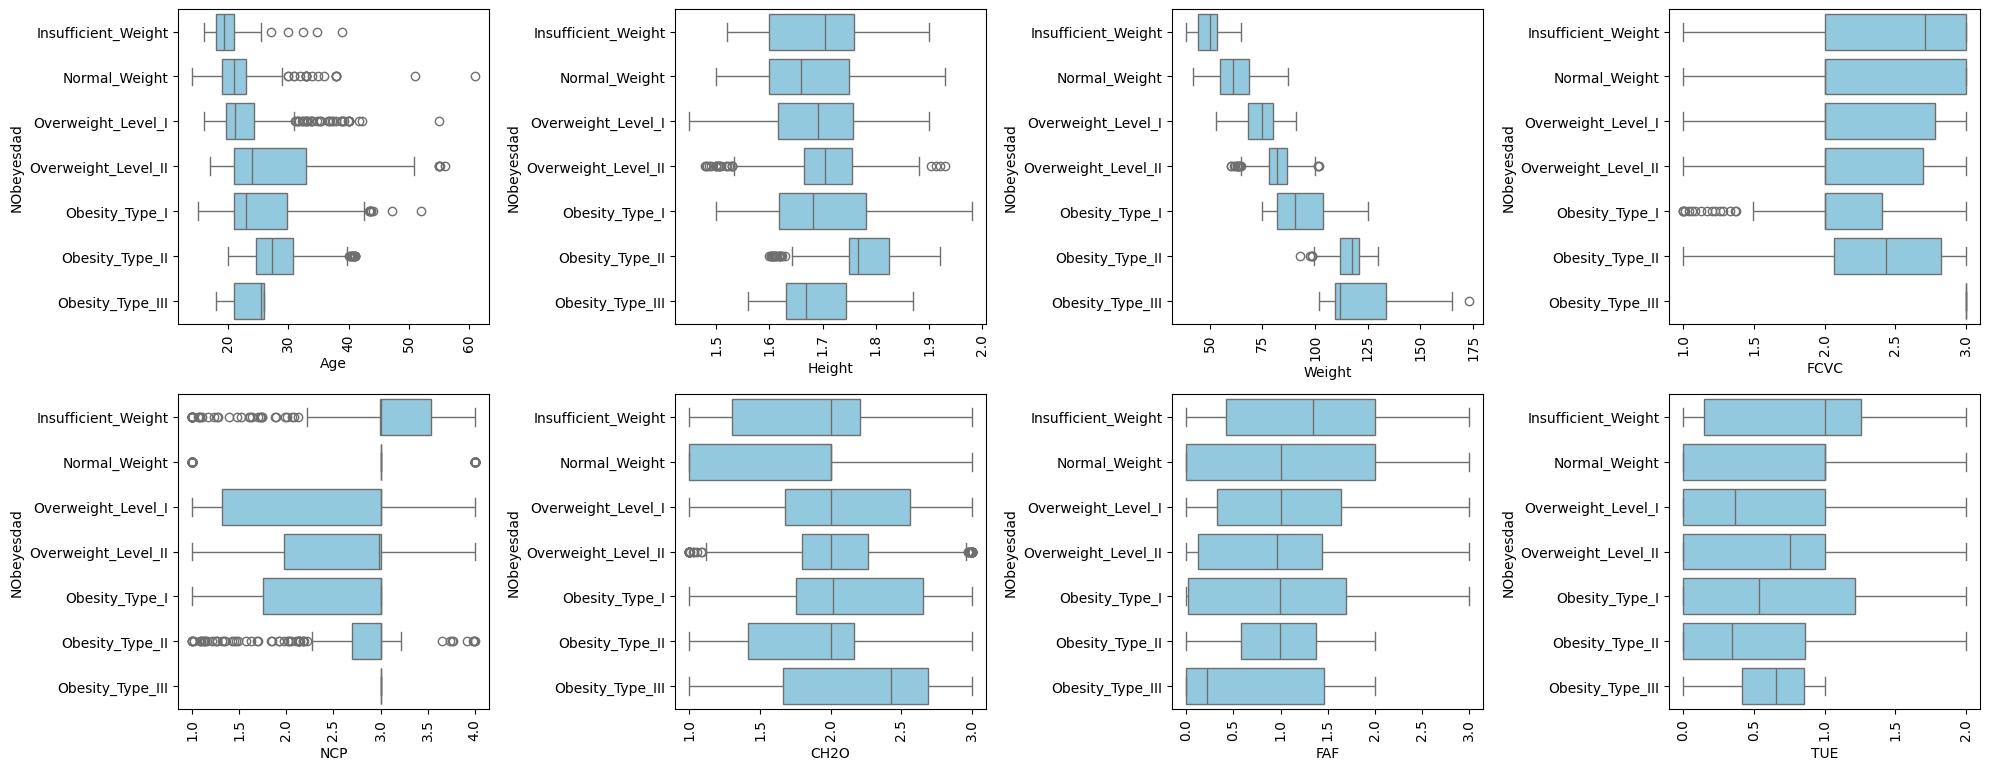

In [ ]:
obesity_type_order=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'], categories=obesity_type_order, ordered=True)
plt.figure(figsize=(20,15))
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns):
  plt.subplot(4,4,i+1)
  sns.boxplot(y='NObeyesdad',x=column, data=df,color='skyblue')
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Análisis de Atípicos y Distribución de Variables:

## A partir de estos diagramas de cajas se puede inferir lo siguiente:


### Weight (Peso)
- Mientras mayor sea el peso, mayor es el nivel de obesidad de la persona.
- No se identifican valores atípicos considerables.

### CH20 (Consumo de agua)
- Se puede observar que la media del consumo de agua es de 2 litros, excepto en el caso de las personas con obesidad tipo III.
- No se identifican valores atípicos considerables.

### FAF (Frecuencia de ejercicio semanal)
- Las personas que se encuentran entre peso normal y obesidad tipo II, tienden a realizar la misma cantidad de ejercicio. Por otra parte, los que tienen peso insuficiente realizan más ejercicio que la mayoría y los que tiene obesidad tipo III realizan una cantidad inferior a la media.
- No se identifican valores atípicos considerables, ya que todos los valores se encuentran dentro los percentiles establecidos.

### NCP (Cantidad de comidas principales al día)
- Según el gráfico se identifica que la media para los diferentes tipos de obesidad es de 3 comidas principales al día.
- Tanto para las personas con peso insuficiente y obesidad tipo 2, existe una cantidad considerable de personas que tienen menos de 2 comidas principales al día.
- Aunque se observa dispersión, no hay datos lo suficientemente alejados de los percentiles

### Age (Edad)
- Se identifica que las personas hacen parte una población adulta, es decir, que están en un rango entre 18 y 60 años.
- Se observa que las personas con obesidad tipo III son una población muy joven.

### FCVC (Frecuencia de consumo de vegetables)
- No se observan valores los suficientemente alejados de los percentiles para ser consideros datos atípicos.

### TUE (Uso de tecnología)
- El percentil 25% de las personas con obesidad tipo III, consume más tecnología que el resto de las personas en el mismo percentil con distinto tipo de obesidad.
- No se observan valores los suficientemente alejados de los percentiles
para ser consideros datos atípicos.

### Height
- No hay diferencia significativa entre las alturas con respecto a los diferentes tipos de obesidad, además, las personas con obesidad tipo II tienen un percentil 25 superior al resto, por lo que se puede decir que normalmente son más altas.
- No se observan valores los suficientemente alejados de los percentiles para ser consideros datos atípicos.

Finalmente no se identifican datos atípicos para ninguna variables por lo cual se conservan todos los

## Distribución de variables
Solo se realiza el análisis a las variables numéricas.


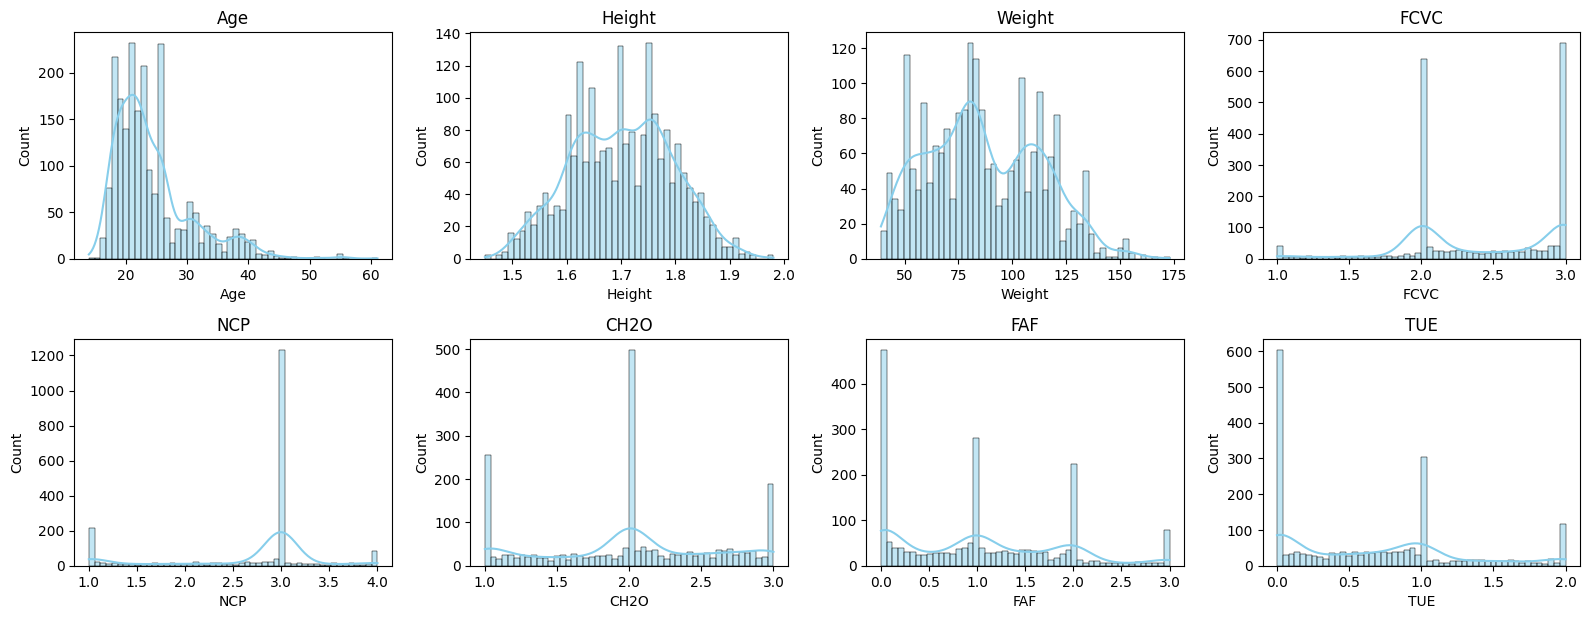

In [ ]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], bins=50, color='skyblue', edgecolor='black', kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Regresión lineal
Para la realización de la regresión lineal se agregó una nueva columna IMC, la cual es calculada con la siguiente ecuación:

IMC = PESO / ALTURA²

In [ ]:
df['IMC']= df['Weight']/((df['Height'])**2)


In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


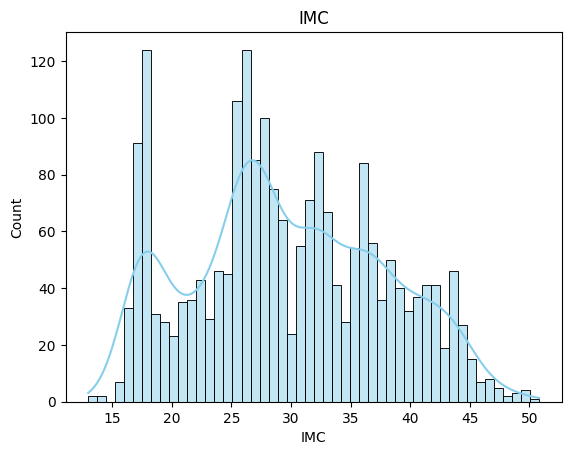

In [ ]:
sns.histplot(df['IMC'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title("IMC")
plt.show()

En el histograma que se obtiene al graficar el IMC se observa que es una distribuión asimétrica y se identifica que es picudo con una Asimetría positiva.

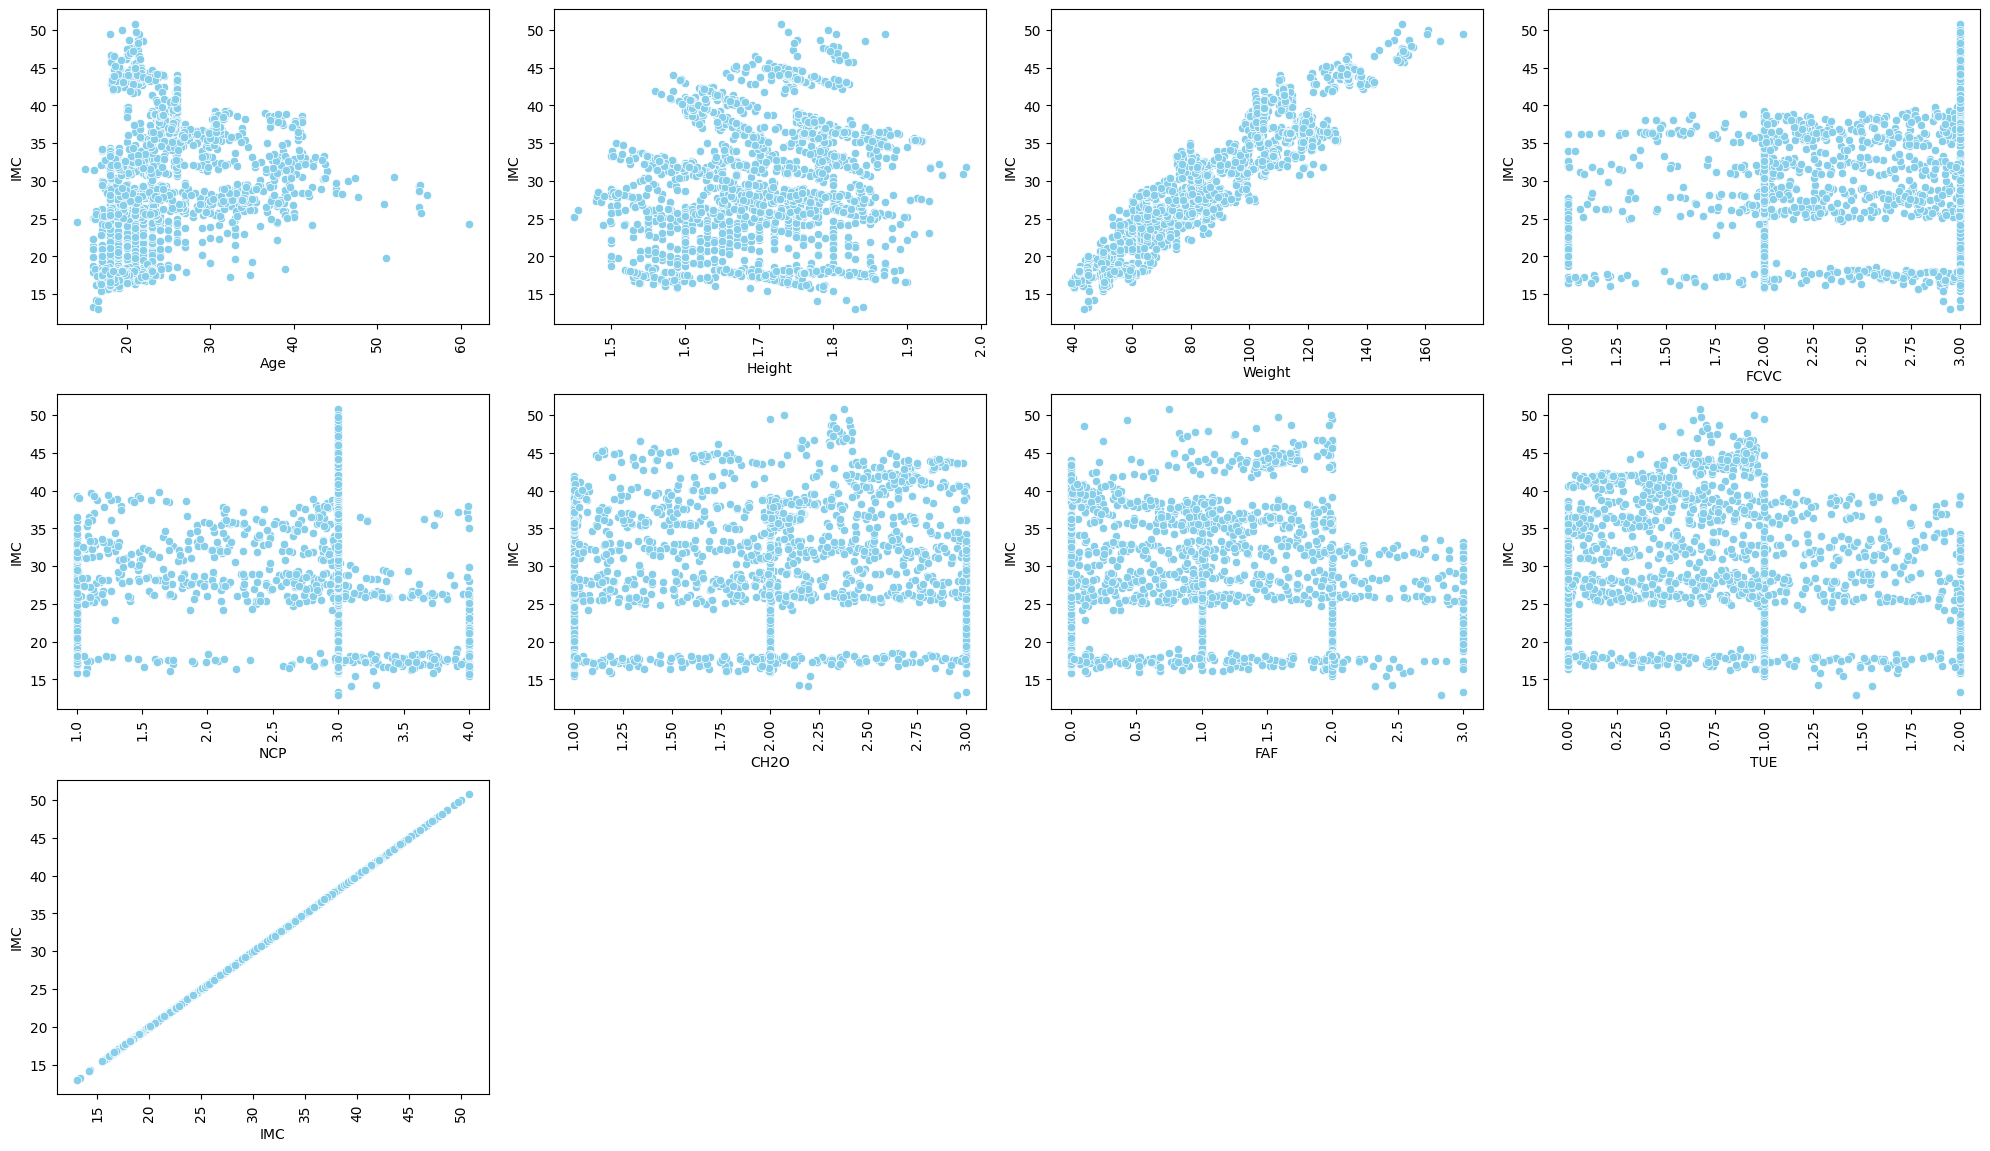

In [ ]:
plt.figure(figsize=(20,15))
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns):
  plt.subplot(4,4,i+1)
  sns.scatterplot(y='IMC',x=column, data=df,color='skyblue')
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Dado que visualmente los resultados pueden llevar a análisis imprecisos se opta por calcular el coeficiente de correlación y realizar el análisis basado en el mismo.

In [ ]:
correlation_with_imc = df.corr()['IMC'].sort_values(ascending=False)
correlation_with_imc

<ipython-input-131-0f86b7a04f61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_imc = df.corr()['IMC'].sort_values(ascending=False)


IMC       1.000000
Weight    0.934806
FCVC      0.263651
Age       0.244163
CH2O      0.144200
Height    0.131785
NCP       0.039969
TUE      -0.099720
FAF      -0.177537
Name: IMC, dtype: float64

## Relación entre las variables
Se calculó el coeficiente de correlación variables numéricas con el IMC y se obtuvo que la única variable que tiene relación postiva fuerte con este es el peso, las demás tiene relaciones positivas débiles o negativas débiles.